In [1]:
import h5py
import pickle 
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
filename1=('/project/rpp-chime/chime/chime_processed/holography/holo_stack/CygA/CYG_A_20181017T021625_to_20191016T022121.h5')
f1 = h5py.File(filename1,'r') 
freqs = f1['index_map']["freq"][()]
lst=[]
angle = f1['index_map']["pix"][()]
for i in angle:
    x=i[1]
    lst.append(x)
#print(len(lst))
frequencies=list(range(1024))
feeds=list(range(2048))
print(np.shape(frequencies))
print(np.shape(feeds))

(1024,)
(2048,)


In [2]:
freq600 = f1['index_map']["freq"][344]
print(freq600)

665.625


In [3]:
FFF=[]
for j in feeds:
    freq600 = f1['index_map']["freq"][344]
        #print(freq600)
    yy600=f1['beam'][344,0,j]
    max_y = max(yy600)
        #print(max_y)
    half = (max_y)/2.0
        #print(half)
    if max_y==0:
        FFF.append(None)
    else:
        max_index=np.where(yy600 == max_y)
        number= max_index[0][0] # This is the index of maximum y value in the list. Peak value of y.
            #print(number)
        y1=yy600[0:number+1]   # List from 1st value to the peak value in the parent list.
        x1=lst[0:number+1]

        y2=yy600[number:]      # List from the peak value to the last value in the parent list.
        x2=lst[number:]
    
        x1_interp = scipy.interpolate.interp1d(y1,x1)
        x2_interp = scipy.interpolate.interp1d(y2,x2)

        x1_half= x1_interp(half)
        x2_half= x2_interp(half)
    
        FWHM = (x2_half - x1_half)
        FFF.append(np.absolute(FWHM))

print(np.shape(FFF))


(2048,)


Text(0.5, 1.0, '665.625 MHz')

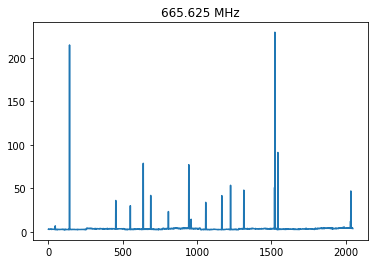

In [4]:
plt.plot(FFF)
plt.title('665.625 MHz')

In [5]:
xyz=np.array(FFF, dtype=np.float)
ddd=[]
for i in xyz:
    if (i<7):
        ddd.append(i)
    else:
        ddd.append(np.nan)

/tmp/ipykernel_216632/3009138851.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xyz=np.array(FFF, dtype=np.float)


(2048,)

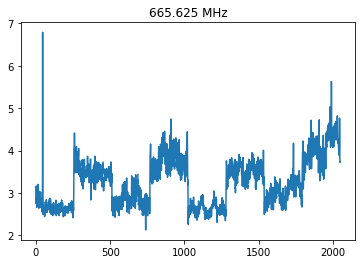

In [6]:
plt.plot((ddd))
plt.title('665.625 MHz')
np.shape(ddd)

(256,)
(256,)
(256,)
(256,)


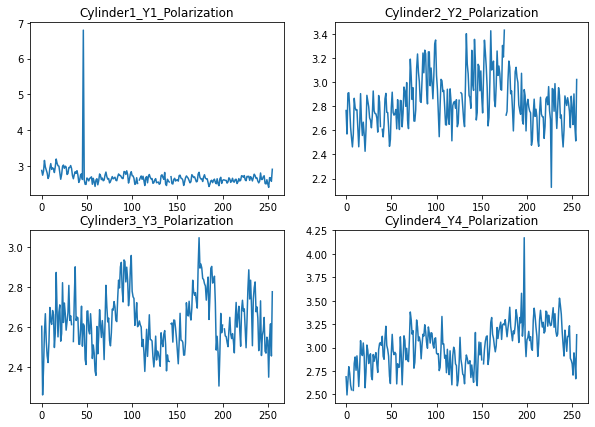

In [7]:
Y1= ddd[0:256]
Y2= ddd[512:768]
Y3= ddd[1024:1280]
Y4= ddd[1536:1792]
print(np.shape(Y1))
print(np.shape(Y2))
print(np.shape(Y3))
print(np.shape(Y4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_Y1_Polarization")
plt.plot(Y1)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_Y2_Polarization")
plt.plot(Y2)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_Y3_Polarization")
plt.plot(Y3)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_Y4_Polarization")
plt.plot(Y4)
#plt.show()


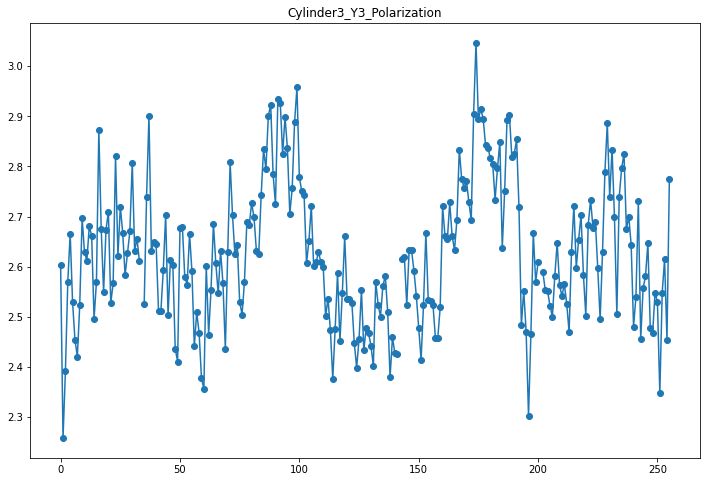

In [8]:
plt.figure(figsize=(12,8))
plt.title("Cylinder3_Y3_Polarization")
plt.plot((Y3),marker='o')

In [9]:
Y_pol = np.concatenate((Y1, Y2,Y3,Y4))
print(np.shape(Y_pol))

(1024,)


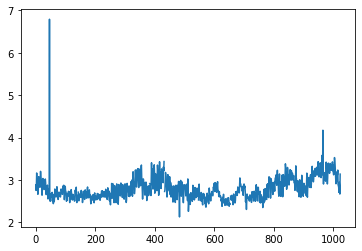

In [10]:
plt.plot(Y_pol)

In [11]:
with open("Beam_offset_CygA_665", "rb") as fp:   # Unpickling
       b = pickle.load(fp)

print(np.shape(b))

(2048,)


In [12]:
type(b)

list

In [13]:
yo=np.array(b, dtype=np.float)

/tmp/ipykernel_216632/1803992708.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yo=np.array(b, dtype=np.float)


In [14]:
print(yo)
np.shape(yo)

[0.16666667 0.25       0.16666667 ... 0.16666667 0.16666667 0.16666667]


(2048,)

(256,)
(256,)
(256,)
(256,)
-0.013833992801636105 2.698519293087028
-0.13681102690734262 2.8432676777275057
0.07152231128549012 3.0155157662444747
0.07152231128549012 3.0155157662444747


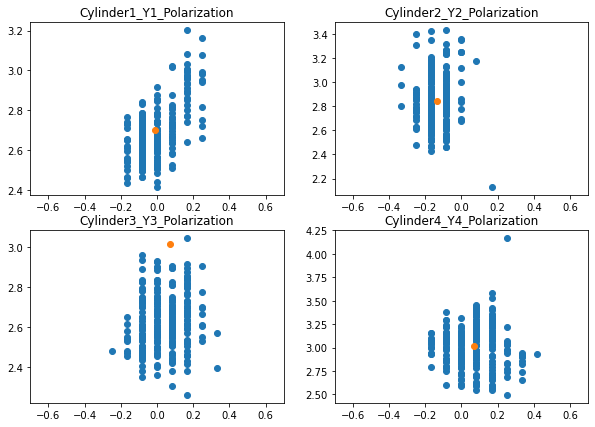

In [32]:
Y11= yo[0:256]
Y22= yo[512:768]
Y33= yo[1024:1280]
Y44= yo[1536:1792]
print(np.shape(Y11))
print(np.shape(Y22))
print(np.shape(Y33))
print(np.shape(Y44))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_Y1_Polarization")
plt.scatter(Y11,Y1)
plt.xlim(-0.7, 0.7)
average_beam1=np.nanmean(Y11)
average_FWHM1=np.nanmean(Y1)

plt.scatter(average_beam1,average_FWHM1)
print(average_beam1,average_FWHM1)
#plt.ylim(3, 7)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_Y2_Polarization")
plt.scatter(Y22,Y2)
plt.xlim(-0.7, 0.7)
average_beam2=np.nanmean(Y22)
average_FWHM2=np.nanmean(Y2)

plt.scatter(average_beam2,average_FWHM2)
print(average_beam2,average_FWHM2)
#plt.ylim(3, 7)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_Y3_Polarization")
plt.scatter(Y33,Y3)
plt.xlim(-0.7, 0.7)
average_beam3=np.nanmean(Y44)
average_FWHM3=np.nanmean(Y4)

plt.scatter(average_beam3,average_FWHM3)
print(average_beam3,average_FWHM3)
#plt.ylim(3, 7)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_Y4_Polarization")
plt.scatter(Y44,Y4)
plt.xlim(-0.7, 0.7)
average_beam4=np.nanmean(Y44)
average_FWHM4=np.nanmean(Y4)

plt.scatter(average_beam4,average_FWHM4)
print(average_beam4,average_FWHM4)
#plt.xlim(-0.7, 0.7)
#plt.ylim(3, 7)
#plt.show()


In [16]:
YY_pol = np.concatenate((Y11,Y22,Y33,Y44))
print(np.shape(YY_pol))

(1024,)


-0.13681102690734262 2.8432676777275057


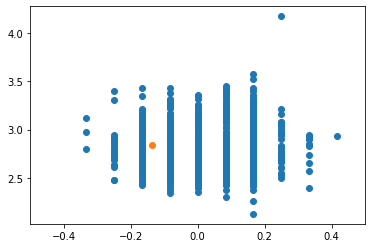

In [31]:
plt.scatter(YY_pol,Y_pol)
plt.xlim(-0.5, 0.5)
average_beam=np.nanmean(Y22)
average_FWHM=np.nanmean(Y2)

plt.scatter(average_beam,average_FWHM)
print(average_beam,average_FWHM)
#plt.ylim(3, 7)

In [22]:
print(np.nanmean(Y22))


-0.13681102690734262


(256,)
(256,)
(256,)
(256,)


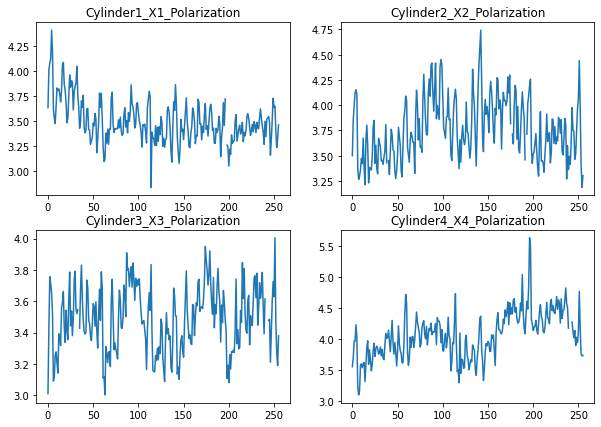

In [23]:
X1= ddd[256:512]
X2= ddd[768:1024]
X3= ddd[1280:1536]
X4= ddd[1792:2048]
print(np.shape(X1))
print(np.shape(X2))
print(np.shape(X3))
print(np.shape(X4))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_X1_Polarization")
plt.plot((X1))
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_X2_Polarization")
plt.plot((X2))
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_X3_Polarization")
plt.plot((X3))
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_X4_Polarization")
plt.plot((X4))
#plt.show()

In [24]:
X_pol = np.concatenate((X1, X2,X3,X4))
print(np.shape(X_pol))

(1024,)


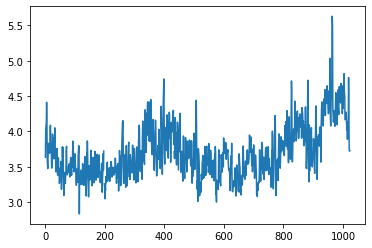

In [25]:
plt.plot(X_pol)

(256,)
(256,)
(256,)
(256,)


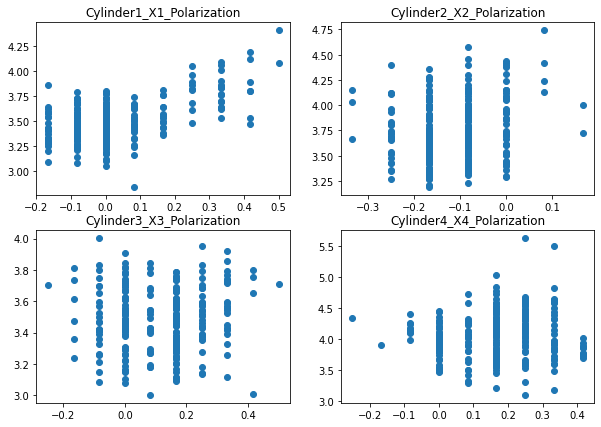

In [26]:
X11= yo[256:512]
X22= yo[768:1024]
X33= yo[1280:1536]
X44= yo[1792:2048]
print(np.shape(X11))
print(np.shape(X22))
print(np.shape(X33))
print(np.shape(X44))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title("Cylinder1_X1_Polarization")
plt.scatter(X11,X1)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()


fig.add_subplot(2,2,2)
plt.title("Cylinder2_X2_Polarization")
plt.scatter(X22,X2)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()

fig.add_subplot(2,2,3)
plt.title("Cylinder3_X3_Polarization")
plt.scatter(X33,X3)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()

fig.add_subplot(2,2,4)
plt.title("Cylinder4_X4_Polarization")
plt.scatter(X44,X4)
#plt.xlim(-0.7, 0.7)
#plt.ylim(4, 7)
#plt.show()

In [27]:
XX_pol = np.concatenate((X11, X22,X33,X44))
print(np.shape(XX_pol))

(1024,)


(-0.5, 0.5)

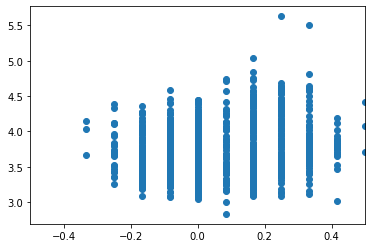

In [28]:
plt.scatter(XX_pol,X_pol)
plt.xlim(-0.5, 0.5)

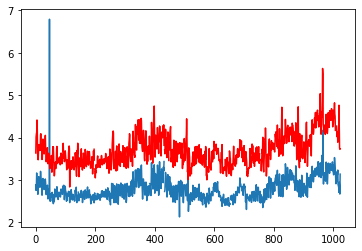

In [29]:
plt.plot(Y_pol)
plt.plot(X_pol,"red")

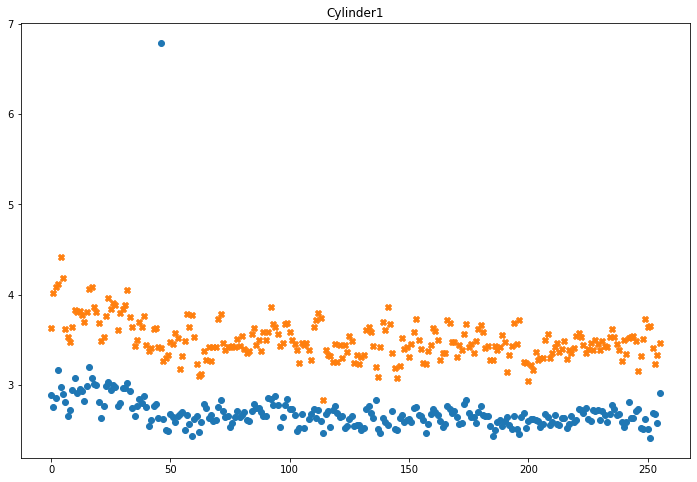

In [34]:
plt.figure(figsize=(12,8))
plt.title("Cylinder1")
#plt.plot((Y1),marker='o')
#plt.plot((X1),marker='X')
plt.scatter(range(256),(Y1),marker='o')
plt.scatter(range(256),(X1),marker='X')

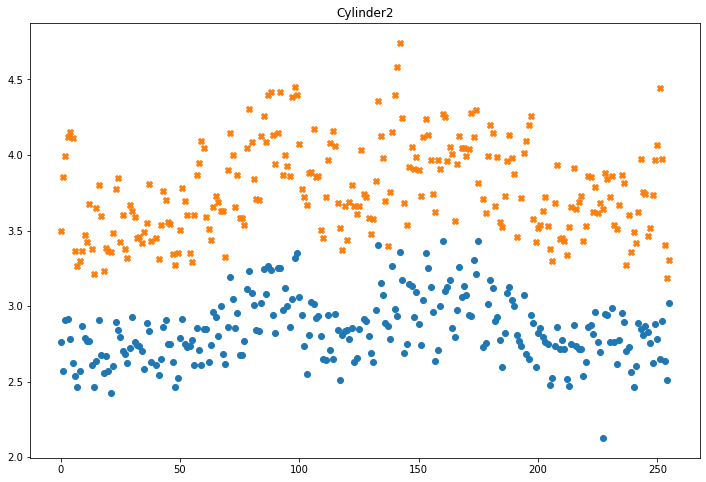

In [35]:
plt.figure(figsize=(12,8))
plt.title("Cylinder2")
plt.scatter(range(256),(Y2),marker='o')
plt.scatter(range(256),(X2),marker='X')

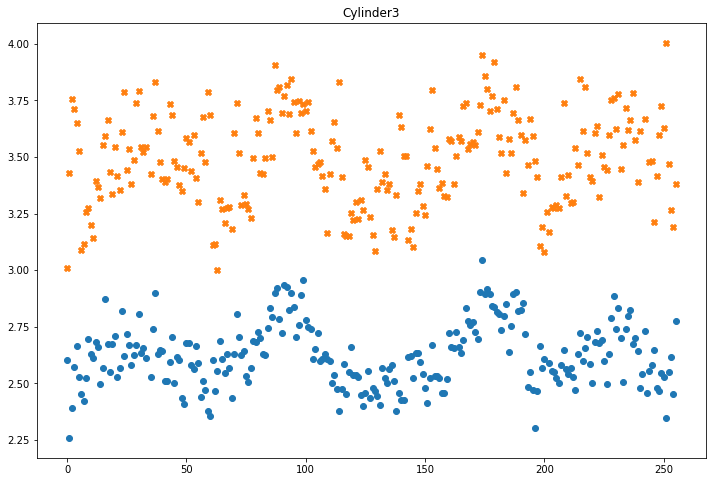

In [36]:
plt.figure(figsize=(12,8))
plt.title("Cylinder3")
plt.scatter(range(256),(Y3),marker='o')
plt.scatter(range(256),(X3),marker='X')

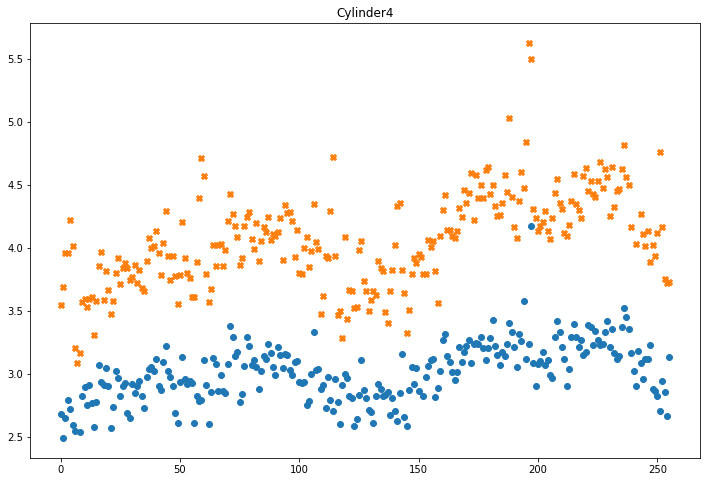

In [37]:
plt.figure(figsize=(12,8))
plt.title("Cylinder4")
plt.scatter(range(256),(Y4),marker='o')
plt.scatter(range(256),(X4),marker='X')